In [477]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import module and load data.

In [478]:
import numpy as np
import pandas as pd

import os

import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

In [479]:
data_path = '/content/drive/MyDrive/aiffel-covid19-EDA/data/coronavirusdataset_20200430.zip'

my_zipfile = zipfile.ZipFile(data_path)
print(my_zipfile.namelist())

with zipfile.ZipFile(data_path) as z:
    
    with z.open("Case.csv") as f:
      case = pd.read_csv(f)
    
    with z.open("PatientInfo.csv") as f:
      p_info = pd.read_csv(f)

    with z.open("PatientRoute.csv") as f:
      p_route = pd.read_csv(f)

    with z.open("Policy.csv") as f:
      policy = pd.read_csv(f)    

    with z.open("Region.csv") as f:
      region = pd.read_csv(f)    

    with z.open("SearchTrend.csv") as f:
      search = pd.read_csv(f)   

    with z.open("SeoulFloating.csv") as f:
      floating = pd.read_csv(f)

    with z.open("Time.csv") as f:
      time = pd.read_csv(f) 

    with z.open("TimeAge.csv") as f:
      t_age = pd.read_csv(f) 

    with z.open("TimeGender.csv") as f:
      t_gender = pd.read_csv(f) 

    with z.open("TimeProvince.csv") as f:
      t_provin = pd.read_csv(f) 

    with z.open("Weather.csv") as f:
      weather = pd.read_csv(f)

['Case.csv', 'PatientInfo.csv', 'PatientRoute.csv', 'Policy.csv', 'Region.csv', 'SearchTrend.csv', 'SeoulFloating.csv', 'Time.csv', 'TimeAge.csv', 'TimeGender.csv', 'TimeProvince.csv', 'Weather.csv']


## Question

분석을 시작하기 전 데이터를 보며 알아보고 싶었던 의문점을 정리해보겠습니다.

1. 슈퍼전파자는 어떤 특성을 가질까?
    - 많은 곳에 돌아다니는 사람일까 아니면 특별히 유동인구가 많은 지역만 골라다니는 사람일까?
    - 증상이 시작된 날짜와 확진날짜의 차이가 있을까?, 증상이 있었음에도 검사를 늦게 받아서 여기저기 전파시킨 건 아닐까?
2. 집단감염이 문제일까?
    - 코로나 초기에 문제가 됐던 대구 신천지 교회발 집단감염이 많은 인원이긴 하지만 실제로는 개별 감염자가 훨씬 많았을 수도 있지 않을까?
    - 집단감염이 많이 되는 곳의 지역적 특성이나 다른 특성이 있을까? 특정 집단이나 산업군에 종사하면 각별히 주의해야 한다고 할 수 있을까?
3. 해외유입을 초기에 막는 것이 얼마나 중요했을까?
    - 초기에 입국제한을 빨리 시행한 나라들은 비교적 코로나를 수월하게 막을 수 있었다는 얘기가 종종 있었는데 사실일까?
    - 해외유입으로 시작됐다고 볼 수 있는 감염자 수는 얼마나 될까? (해외유입A → 국내환자A → 국내환자 C,D ...)
4. 전반적인 시계열 분석
    - 코로나 확진자수가 점점 어떻게 변해가고 있을까? 정부 정책과는 어떤 상관관계가 있을까?
5. 왜 20대들이 백신을 맞아야 하는걸까?
    - 만약 코로나로 인한 사망률이 현저하게 낮다면 또는 비교가 가능해서 백신에 비해 사망률이 적다면 굳이 맞을 필요가 있을까? 하지만 20대들이 사망률은 낮지만 그만큼 전파율이 높다면 집단방역을 위해 꼭 맞아야 한다고 설명을 할 수 있지 않을까?
6. 학교와 확진자수의 관계는 어떨까?(태환)
    - 유치원, 초등학교가 밀집된 지역은 유달리 조심해서 확진자 수가 적을까?
    - 대학교가 많은 지역은 확진자 수가 더 많을까? 조기에 비대면으로 바뀌어 적을까?
    - → 딱히 그렇다고 얘기하기는 힘들 것 같다.
7. 날씨와 확진자수의 관계는 어떨까?
    - 날씨가 좋으면 나가서 노는 사람이 많아서 확진자 수가 많아질까?
    - 날씨가 습하면 마스크 쓰기가 힘들어서 확진자 수가 많아질까?
    - 실제로 바이러스 전파와 습도, 온도가 관계가 있을까?


## 1. Case
감염사례에 대한 데이터를 분석해보겠습니다. 우선 공식 커널의 설명을 보면서 궁금한 적 참고할만한 점이 있는 지에 초점을 두고 하나씩 살펴보겠습니다.



### (1) case_id
case_id의 구성이 region_code와 case_number로 나눠져있다는 사실을 알 수 있습니다. region_code는 'Region.csv'를 가져온 region 데이터를 통해 확인 할 수 있고, case_number는 infection_case에 따라 분류했지 않을까 생각을 해볼 수 있을 것 같습니다. 이 부분에 대해 확인을 해보겠습니다.

In [480]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


In [481]:
region_codes = case['case_id'].apply(lambda x: str(x)[:5]).unique()
region.loc[region['code'].isin(region_codes)][['province', 'city']]

,province,city
0,Seoul,Seoul
26,Busan,Busan
43,Daegu,Daegu
52,Gwangju,Gwangju
58,Incheon,Incheon
69,Daejeon,Daejeon
75,Ulsan,Ulsan
81,Sejong,Sejong
82,Gyeonggi-do,Gyeonggi-do
114,Gangwon-do,Gangwon-do


case 데이터에 포함되어있는 지역은 어떤 도(province)에 속하는 지만 표시가 되어있습니다. 

*(실제로 `region['code'].nunique()`와 같은 방식으로 확인을 하면 차이가 납니다.)*

case_id는 어떻게 구성되어있는지 한번 살펴보겠습니다.

In [482]:
case[['case_id', 'infection_case']]

,case_id,infection_case
0,1000001,Guro-gu Call Center
1,1000002,Dongan Church
2,1000003,Manmin Central Church
3,1000004,Eunpyeong St. Mary's Hospital
4,1000005,Seongdong-gu APT
...,...,...
107,6100009,contact with patient
108,6100010,etc
109,7000001,overseas inflow
110,7000002,contact with patient


In [483]:
temp_case = case.copy()
case_number = case['case_id'].apply(lambda x: str(x)[-2:])
temp_case['case_number'] = case_number

In [484]:
temp_case[temp_case['case_number'] == '01']['infection_case']

0                   Guro-gu Call Center
11                        Onchun Church
20                   Shincheonji Church
29                   Shincheonji Church
33                  Guro-gu Call Center
38      Korea Forest Engineer Institute
44                   Shincheonji Church
48     Ministry of Oceans and Fisheries
54      River of Grace Community Church
63                   Shincheonji Church
69                   Shincheonji Church
74              gym facility in Cheonan
79                   Shincheonji Church
82                Manmin Central Church
87                   Shincheonji Church
99                   Shincheonji Church
109                     overseas inflow
Name: infection_case, dtype: object

In [485]:
temp_case[temp_case['case_number'] == '02']['infection_case']

1                      Dongan Church
12                Shincheonji Church
21             Second Mi-Ju Hospital
30                   overseas inflow
34                Shincheonji Church
39                Shincheonji Church
45                   overseas inflow
49            gym facility in Sejong
55               Guro-gu Call Center
64     Uijeongbu St. Mary’s Hospital
70         Goesan-gun Jangyeon-myeon
75              Seosan-si Laboratory
80                   overseas inflow
83                Shincheonji Church
88          Cheongdo Daenam Hospital
100                  Geochang Church
110             contact with patient
Name: infection_case, dtype: object

case_number가 다르지만 같은 감염사례로 분류되는 경우가 있습니다. 이를 다시 한번 case 데이터를 보면서 살펴보겠습니다.

In [486]:
case[case['province'] == 'Seoul']

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
5,1000006,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
6,1000007,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377
7,1000008,Seoul,from other city,True,Shincheonji Church,8,-,-
8,1000009,Seoul,-,False,overseas inflow,321,-,-
9,1000010,Seoul,-,False,contact with patient,18,-,-


In [487]:
case[case['province'] == 'Busan']

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
11,1100001,Busan,Dongnae-gu,True,Onchun Church,39,35.21628,129.0771
12,1100002,Busan,from other city,True,Shincheonji Church,12,-,-
13,1100003,Busan,Suyeong-gu,True,Suyeong-gu Kindergarten,5,35.16708,129.1124
14,1100004,Busan,Haeundae-gu,True,Haeundae-gu Catholic Church,6,35.20599,129.1256
15,1100005,Busan,Jin-gu,True,Jin-gu Academy,4,35.17371,129.0633
16,1100006,Busan,from other city,True,Cheongdo Daenam Hospital,1,-,-
17,1100007,Busan,-,False,overseas inflow,25,-,-
18,1100008,Busan,-,False,contact with patient,18,-,-
19,1100009,Busan,-,False,etc,29,-,-


이런식으로 지역별로 많은 순대로 case_number를 붙이고 마지막 세 자리는 차례대로 overseas inflow, contact with patient, etc로 매겨져있음을 알 수 있습니다. 지역별 분석을 하게 되면 별도의 분류없이 case_number(case_id 뒤 두 자리)를 통해 누적 확진자가 많은 순대로 파악할 수 있을 것 같습니다.

### (2) province & city

지역별 감염사례 수를 파악하는 것으로 시작해보겠습니다.

In [488]:
prov_count = case['province'].value_counts().reset_index()
prov_count.rename(columns={"index": "province",
                           "province": "count"}, inplace=True)
prov_count.head()

,province,count
0,Gyeongsangbuk-do,12
1,Seoul,11
2,Gyeongsangnam-do,10
3,Busan,9
4,Daegu,9


In [489]:
prov_count

,province,count
0,Gyeongsangbuk-do,12
1,Seoul,11
2,Gyeongsangnam-do,10
3,Busan,9
4,Daegu,9
5,Gyeonggi-do,9
6,Daejeon,6
7,Gangwon-do,6
8,Sejong,6
9,Incheon,5


Text(0, 0.5, 'Province')

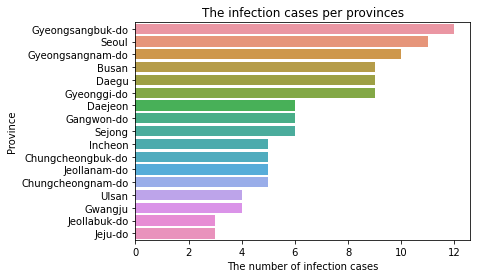

In [490]:
fig, ax = plt.subplots()
sns.barplot(data=prov_count, x='count', y='province', ax=ax)

ax.set_title("The infection cases per provinces")
ax.set_xlabel("The number of infection cases")
ax.set_ylabel("Province")

In [491]:
city_count = case['city'].value_counts().reset_index()
city_count.rename(columns={"index": "city",
                           "city": "count"}, inplace=True)
city_count.head()

,city,count
0,-,50
1,from other city,22
2,Gyeongsan-si,3
3,Sejong,2
4,Dalseong-gun,2


Text(0, 0.5, 'Province')

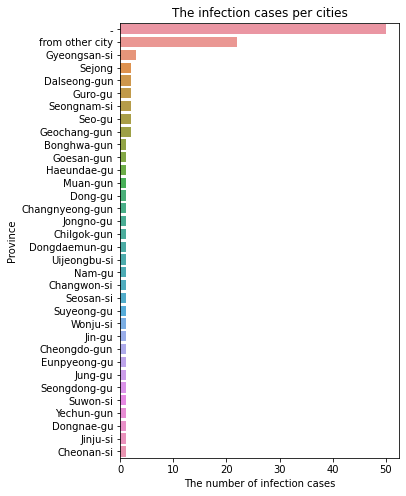

In [492]:
fig, ax = plt.subplots(figsize=(5, 8))
sns.barplot(data=city_count, x='count', y='city', ax=ax)

ax.set_title("The infection cases per cities")
ax.set_xlabel("The number of infection cases")
ax.set_ylabel("Province")

다양한 경우가 있는 '-' 와 'from other city'를 제외하면 대부분 1~3개의 감염사례가 있는 것으로 볼 수 있습니다. 'province'에는 없는 '-'와 'from other city' 값이 'city'에 있습니다. 

추가적으로 공식 커널의 설명에서 "'from other city'는 집단감염이 다른 도시에서 시작됐음을 의미합니다." 라고 한 것을 보면, city는 감염이 시작된 도시를 의미하는 것이 아닐까 유추할 수 있을 것 같습니다.


### (3) group
집단감염과 그렇지 않은 경우에 대해 간단히 살펴보겠습니다.

In [493]:
group_count = case['group'].value_counts().reset_index()
group_count.rename(columns={"index": "group",
                            "group": "count"}, inplace=True)
group_count.head()

,group,count
0,True,62
1,False,50


Text(0, 0.5, 'Number of infection cases')

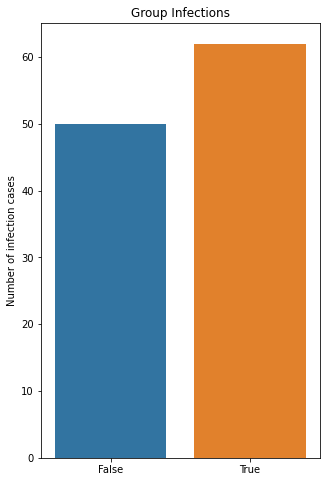

In [494]:
fig, ax = plt.subplots(figsize=(5, 8))
sns.barplot(data=group_count, x='group', y='count', ax=ax)

# for p in ax.patches:
#     h_norm = (p.get_height() - h_min) / (h_max - h_min)
#     p.set_facecolor(cmap(h_norm))

#     left, bottom, width, height = p.get_bbox().bounds
#     if height >= 60:
#         ax.annotate(int(height), (left+width/2, height+0.5), ha='center', color='k')
        
ax.set_title("Group Infections")
ax.set_xlabel("")
ax.set_ylabel("Number of infection cases")

집단감염이 조금 더 많은 결과를 보여줍니다. 집단감염 여부를 hue로 이용해 시각화를 하는 방향이 조금 더 좋을 것 같습니다.

### (4) infection_case
감염경로별 확진자 수에 대해서 알아보겠습니다.

In [495]:
case['infection_case'].nunique()

43

In [496]:
case_confirmed_df = case.groupby('infection_case')['confirmed'].sum().sort_values(ascending=False)
case_confirmed_df.head()

infection_case
Shincheonji Church       5212
contact with patient     1250
etc                      1030
overseas inflow           777
Second Mi-Ju Hospital     196
Name: confirmed, dtype: int64

In [497]:
case_confirmed_df = case.groupby('infection_case')['confirmed'].sum().sort_values(ascending=False).reset_index()
case_confirmed_df.head()

,infection_case,confirmed
0,Shincheonji Church,5212
1,contact with patient,1250
2,etc,1030
3,overseas inflow,777
4,Second Mi-Ju Hospital,196


In [498]:
other_sum = case_confirmed_df[4:]['confirmed'].sum()

In [499]:
case_confirmed_df = case_confirmed_df[:4]
temp_df = pd.DataFrame({"infection_case": ["other_group_infections"], "confirmed": [other_sum]})
case_confirmed_df = case_confirmed_df.append(temp_df, ignore_index=True)

case_confirmed_df.sort_values(by='confirmed', ascending=False, inplace=True, ignore_index=True)

In [500]:
case_confirmed_df

,infection_case,confirmed
0,Shincheonji Church,5212
1,other_group_infections,1580
2,contact with patient,1250
3,etc,1030
4,overseas inflow,777


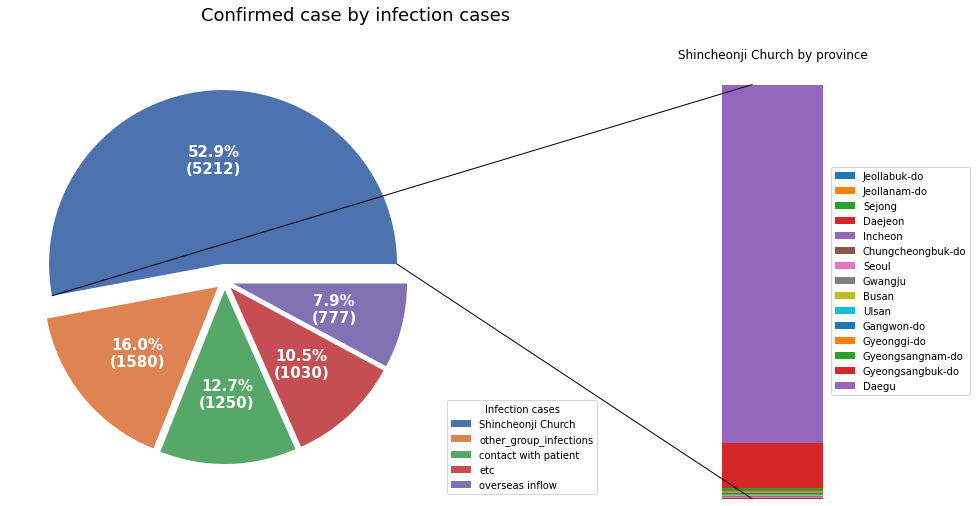

In [501]:
fig, axes = plt.subplots(figsize=(18, 8), gridspec_kw={'width_ratios': [3.5, 1]}, 
                         nrows=1, ncols=2)
axs = axes.ravel()


fig.suptitle("Confirmed case by infection cases", fontsize = 18)

data = case_confirmed_df['confirmed']
labels = list(case_confirmed_df['infection_case'])

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute})".format(pct, absolute)


palette = sns.color_palette("deep", 5)
explode = [0.1, 0.05, 0.05, 0.05, 0.05]
wedges, texts, autotexts = axs[0].pie(data, autopct=lambda pct: func(pct, data),
                                      colors=palette,
                                      textprops=dict(color="w", fontsize=15, fontweight='bold'),
                                      explode=explode)
axs[0].legend(wedges, labels,
              title="Infection cases",
              loc="lower left",
              bbox_to_anchor=(1, 0, 0.5, 1))


tmp_df = case[case['infection_case'] == 'Shincheonji Church'].groupby('province')['confirmed'].sum()
tmp_df.sort_values(inplace=True)
tmp_df = tmp_df.reset_index()
tmp_df = tmp_df.set_index('province').transpose()

tmp_df.plot.bar(stacked=True, ax=axs[1])
axs[1].legend(loc='center right', bbox_to_anchor=(1, 0, 0.5, 1))
axs[1].axis('off')
axs[1].set_title("Shincheonji Church by province")

from matplotlib.patches import ConnectionPatch
# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = axs[0].patches[0].theta1, axs[0].patches[0].theta2
center, r = axs[0].patches[0].center, axs[0].patches[0].r
bar_height = sum([item.get_height() for item in axs[1].patches])

# draw top connecting line
width = .2
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=axs[1].transData,
                      xyB=(x, y), coordsB=axs[0].transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
axs[1].add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=axs[1].transData,
                      xyB=(x, y), coordsB=axs[0].transData)
con.set_color([0, 0, 0])
axs[1].add_artist(con)
con.set_linewidth(1)


현재 사용하고 있는 데이터는 비교적 예전 데이터이기 때문에 신천지 교회에서 집단감염된 사례가 아주 많은 부분을 차지하고 있는 것을 알 수 있습니다. 기타 집단감염 케이스를 'other_group_infections'로 묶었음에도 불구하고 신천지 교회가 가장 큰 비율을 차지하고 있음을 알 수 있습니다.

### (5) confirmed
1. 지역별 확진자 수 
2. 집단감염 유무에 따른 확진자 수
를 살펴보겠습니다.

감염사례별 확진자 수는 위 챕터에서 이미 살펴봤기 때문에 생략하겠습니다.

In [502]:
prov_confirmed_df = case.groupby('province')['confirmed'].sum().sort_values(ascending=False).reset_index()
prov_confirmed_df.head()

,province,confirmed
0,Daegu,6650
1,Gyeongsangbuk-do,1314
2,Seoul,574
3,Gyeonggi-do,556
4,Busan,139


Text(0, 0.5, 'Confirmed')

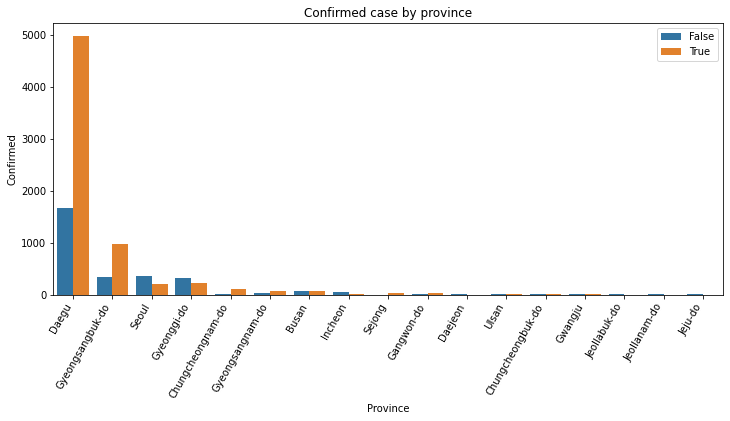

In [503]:
fig, ax = plt.subplots(figsize=(12, 5))
tmp_df = case.groupby(['province', 'group'])['confirmed'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=tmp_df, x='province', y='confirmed', hue='group', ax=ax)

x_tick_labels = [t.get_text() for t in ax.get_xticklabels()]
t = ax.set_xticklabels(x_tick_labels, rotation=60, ha='right')
ax.legend(loc='upper right')

ax.set_title("Confirmed case by province")
ax.set_xlabel("Province")
ax.set_ylabel("Confirmed")

알고있는 대로 대구, 경북의 확진자가 압도적으로 많으며 대부분이 집단감염자인 것을 확인할 수 있습니다. 역시나 신천지가 큰 영향을 끼치고 있음을 알 수 있습니다.

## 2. PatientInfo
국내 코로나 환자에 대한 전염병학적 정보를 모아놓은 데이터를 가지고 분석을 진행해보겠습니다. 분석을 유의미하게 할 수 있는 다양한 특성이 많으므로 하나씩 살펴보면서 무엇을 찾아낼 수 있을 지 생각해보면 분석을 진행해보겠습니다.



In [504]:
p_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


### (1) sex, age
우선 patient_id, global_num과 같은 신원을 파악하기 위한 특성을 제외하고 성별에 관한 분석부터 시작해보겠습니다. 일반적으로 생각했을 때는 성별에 따른 차이는 없을 것 같습니다. 나이에 관해서는 아무래도 각종 야외활동이 많은 세대일 수록 많이 걸릴 것 같습니다. 예를 들면 10세 이하의 어린아이들 보다는 30~40대에 걸친 직장인들이 더 많이 걸릴 것 같습니다.

위에서 얘기한 직관을 염두에 두고 데이터를 분석하며 차이가 있는 지 살펴보고 왜 그런 차이가 생겼는 지 생각해보겠습니다.

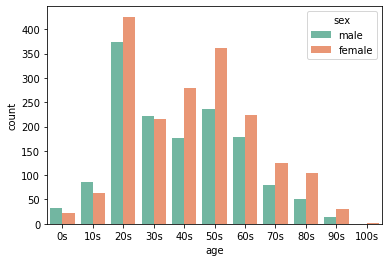

In [505]:
age_group_idx = ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s']
sns.countplot(x=p_info['age'],  order=p_info['age'].value_counts().reindex(age_group_idx).index,
              hue=p_info['sex'], hue_order=['male', 'female'], palette="Set2")

위 그림을 통해서 살펴봤을 때 우선 나이만 고려해서 살펴보면 20~60대에 많은 경제활동인구가 몰려있어 확진자가 많이 나오는 것으로 추측할 수 있을 것 같습니다.

성별을 생각해보면 20대와 30대는 조금씩 차이가 나긴하지만 거의 근소한 모습을 보이는 반면 40, 50대는 유달리 여성이 더 많이 코로나에 걸린 것을 볼 수 있습니다. 어쩌면 질병학적으로 코로나에 취약한 특성을 가진 것이라고 생각할 수도 있을 것 같습니다. 해당 부분에 대해 확인하기 위해서 40~50대 여성집단을 살펴보겠습니다.

In [506]:
ma_female = p_info.loc[(((p_info['age'] == "40s") | (p_info['age'] == "50s")) & (p_info['sex'] == "female"))]
ma_female = ma_female.groupby('infection_case')['patient_id'].count().reset_index()
ma_female.rename(columns={"patient_id": "count"}, inplace=True)
ma_female.sort_values(by='count', ascending=False)             

,infection_case,count
16,contact with patient,210
17,etc,89
5,Guro-gu Call Center,57
20,overseas inflow,36
18,gym facility in Cheonan,21
14,Shincheonji Church,17
0,Bonghwa Pureun Nursing Home,7
11,Onchun Church,4
8,Gyeongsan Seorin Nursing Home,3
9,Milal Shelter,3


환자와의 접촉, 기타 등등의 이유를 제외하면 구로구 콜센터 감염사례가 가장 많은 수를 차지하고 있습니다.

In [507]:
p_info.loc[p_info['infection_case'] == 'Guro-gu Call Center']['sex'].value_counts()

female    82
male      30
Name: sex, dtype: int64

In [508]:
p_info.loc[p_info['infection_case'] == 'Guro-gu Call Center']['age'].value_counts()

50s    36
40s    34
30s    15
20s    13
60s     8
10s     2
0s      2
70s     1
80s     1
Name: age, dtype: int64

실제로 간단하게 위와 같이 확인해보면 여성의 비율이 남성의 비율보다 훨씬 높은 것을 확인할 수 있고 따라서 이러한 이유로 40~50대에 해당하는 여성의 비율이 높게 나왔다는 사실을 알 수 있습니다.

### (2) country, city
province, infection_case 등은 case와 같은 컬럼을 공유하고 있습니다. (공식커널참고) 따라서 국적, 행정상 주소지로 등록되어 있는 도시에 대해 분석을 진행하겠습니다.

In [509]:
p_info['country'].value_counts()

Korea            3361
China              11
United States       6
Thailand            2
Indonesia           1
Mongolia            1
Spain               1
Switzerland         1
Canada              1
France              1
Vietnam             1
Germany             1
Name: country, dtype: int64

당연하게도 국내 데이터이기 때문에 한국 국적이 가장 많은 것을 확인할 수 있습니다. 행정상 주소지에 대해 살펴보겠습니다.

In [510]:
p_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [511]:
p_info['city'].value_counts()

Gyeongsan-si    632
Seongnam-si     125
Cheonan-si      107
Bucheon-si       73
Bonghwa-gun      71
               ... 
Gapyeong-gun      1
Yeongwol-gun      1
Hwasun-gun        1
Haman-gun         1
Taebaek-si        1
Name: city, Length: 154, dtype: int64

경산시가 압도적으로 환자수가 많이 있습니다. 아무래도 경북지역이다 보니 신천지와 관련이 있을 것 같습니다. [(기사)](https://www.joongang.co.kr/article/23723009#home)

우리가 가진 데이터로도 한번 확인을 해보겠습니다.

In [512]:
p_info.loc[p_info['city'] == 'Gyeongsan-si'].head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2029,6001000001,67.0,female,1991.0,20s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,Shincheonji Church,NaN,1.200000e+09,7.0,NaN,2020-02-19,2020-04-09,NaN,released
2030,6001000002,73.0,female,2001.0,10s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,NaN,NaN,NaN,2.0,NaN,2020-02-19,2020-03-19,NaN,released
2031,6001000003,91.0,female,1974.0,40s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,NaN,NaN,NaN,3.0,NaN,2020-02-20,2020-03-06,NaN,released
2032,6001000004,105.0,female,1965.0,50s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,NaN,NaN,NaN,5.0,NaN,2020-02-20,2020-03-25,NaN,released
2033,6001000005,106.0,female,1991.0,20s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,NaN,NaN,NaN,2.0,NaN,2020-02-20,2020-03-18,NaN,released


In [513]:
p_info.loc[p_info['city'] == 'Gyeongsan-si']['infection_case'].value_counts()

etc                                      65
Gyeongsan Seorin Nursing Home            15
Gyeongsan Jeil Silver Town               12
Gyeongsan Cham Joeun Community Center    10
Shincheonji Church                        2
overseas inflow                           1
Name: infection_case, dtype: int64

In [514]:
p_info.loc[p_info['city'] == 'Gyeongsan-si']['infection_case'].isnull().sum()

527

실제로는 신천지 교회를 통한 감염사례는 2개의 사례밖에 없습니다. 이는 대부분의 값이 NaN으로 남겨져있기 때문입니다. 데이터에서 디테일한 설명은 없지만 아무래도 정보를 공개하지 않았기 때문으로 생각할 수 있을 것 같습니다. 

해당 부분에 대해서 case 데이터의 위도, 경도 정보를 이용해 파악할 수 있을 지 살펴보려고 했지만 case에 등장하는 지역별 사례에 해당하는 데이터와 환자의 행정상 주소지와 일치하지 않는 경우를 고려해야하는 어려움이 있어 진행하지 못했습니다.

실제로 case에서 경산시에 해당하는 데이터를 찾아보면 신천지 사례가 나오지 않고 있습니다.

(누적확진자, 환자데이터 사이의 수 차이는 왜 날까?)

In [515]:
case[case['city'] == 'Gyeongsan-si']

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
92,6000006,Gyeongsangbuk-do,Gyeongsan-si,True,Gyeongsan Seorin Nursing Home,66,35.782149,128.801498
94,6000008,Gyeongsangbuk-do,Gyeongsan-si,True,Gyeongsan Jeil Silver Town,17,35.84819,128.7621
95,6000009,Gyeongsangbuk-do,Gyeongsan-si,True,Gyeongsan Cham Joeun Community Center,16,35.82558,128.7373


### (3) infected_by, contact_number

누구에게 감염을 많이 당했는지, 또 몇명과 접촉을 했는 지를 살펴보면 슈퍼전파자등에 대한 정보를 얻을 수 있을 것 같습니다. 우선 NaN값이 많으므로 NaN 값을 제외한 데이터셋을 만들고, 환자 id 값이 들어가는 infected_by를 실제 숫자의 의미가 없는 string꼴로 바꿔주겠습니다.

In [516]:
infected_p = p_info[p_info['infected_by'].notna()]

In [517]:
infected_p.loc[:, 'infected_by'] = infected_p['infected_by'].astype("string")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [518]:
infected_count = infected_p['infected_by'].value_counts().reset_index()
infected_count.rename(columns={"index": "infected_by",
                               "infected_by": "count"}, inplace=True)
infected_count

,infected_by,count
0,2000000205.0,51
1,4100000008.0,27
2,2000000167.0,24
3,4100000006.0,21
4,2000000309.0,21
...,...,...
365,1000000227.0,1
366,4100000052.0,1
367,1000000060.0,1
368,4100000029.0,1


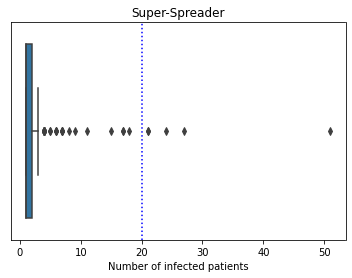

In [519]:
fig, ax = plt.subplots()
sns.boxplot(x=infected_count['count'], ax=ax)
ax.set_yticks([])

ax.set_title("Super-Spreader")
ax.set_xlabel("Number of infected patients")

ax.axvline(x=20, c="blue", linestyle=":")

가장 많은 환자를 감염시킨 '2000000205' 번 환자에 대해 알아보겠습니다. 공식 커널의 댓글을 통해 infection order에 대한 다음과 같은 설명을 찾아볼 수 있었습니다.

> 'infection order = 1' means infection was from Wuhan.
    'infection order = 2' means infection was from the one whose infection order is 1. 
    'infection order = n' means infection was from the one whose infection order is n-1.
    Null values mean that we cannot check the infection order.



In [520]:
p_info[p_info['patient_id'] == 2000000205]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1285,2000000205,8100.0,female,1946.0,70s,Korea,Gyeonggi-do,Seongnam-si,NaN,contact with patient,NaN,1.000000e+09,8.0,NaN,2020-03-14,NaN,NaN,isolated


이를 통해 확인해보면 2000000205번 환자는 infection_order는 알 수 없지만 1000000000번 환자를 통해 감염됐음을 확인할 수 있습니다. 하지만 p_info는 1000000001번부터 시작되있습니다.

*어떻게 된 건지 추후에 살펴봐야겠습니다.*

2000000205번 환자와 접촉한 사람들을 살펴보며 어떤 특징이 있는지 살펴보겠습니다. 

In [521]:
exam_p = p_info[p_info['infected_by'] == 2000000205]

In [522]:
exam_p.groupby(['city', 'age', 'sex']).size()

city          age  sex   
Namyangju-si  30s  male       1
Seongnam-si   10s  female     1
                   male       2
              20s  female     5
                   male       7
              30s  female     1
                   male       2
              40s  female     3
                   male       2
              50s  female    14
                   male       3
              60s  female     6
                   male       2
              70s  female     1
Yongin-si     30s  female     1
dtype: int64

대부분 성남시에서 접촉이 이뤄졌다는 점, 50대 여성이 가장 많은 비율이라는 점 이외에는 별다른 특징이 있어보이지는 않습니다. 나이대나 성별이 모두 넓은 범위 퍼져있는 것으로 보아 아무래도 거주지역과 관련있는 사례로 분류할 수 있을 것 같습니다.

비슷한 방식으로 'contact_number'에 대해서도 분석을 해보겠습니다. 다시 위로 살짝 돌아가보겠습니다.

In [523]:
p_info[p_info['patient_id'] == 2000000205]['contact_number']

1285    8.0
Name: contact_number, dtype: float64

감염시킨 사람이 51명인, (infectedy_by = 51)인 2000000205번 환자의 contact_number는 8로 나오는 것을 확인할 수 있습니다. 즉 직접 접촉한 사람은 8명이고 infected_by에는 그 후에 접촉하게 되는 경우도 포함이 되있는 것으로 생각할 수 있을 것 같습니다.

이번에도 위와 같이 contact_number가 NaN인 경우가 많습니다. 이러한 경우들을 제외하고 데이터를 추출해 살펴보겠습니다.

In [524]:
contact_p = p_info[p_info['contact_number'].notna()]
contact_p

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


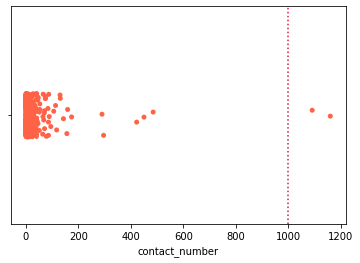

In [525]:
fig, ax = plt.subplots()
sns.stripplot(x=contact_p['contact_number'], color='tomato', ax=ax)
ax.axvline(x=1000, c="crimson", linestyle=":")

대부분 작은 수에 머물러있습니다, 200명이상 접촉한 경우도 매우 많은 경우로 분류할 수 있을 것 같고 심지어는 1000명이 넘게 접촉한 2명이 있습니다. 해당 환자들에 대해 알아보겠습니다.

In [526]:
super_spreader_group = contact_p.loc[contact_p['contact_number'] >= 200]

In [527]:
super_spreader_group

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
633,1100000001,NaN,male,2001.0,10s,Korea,Busan,Dongnae-gu,NaN,Onchun Church,NaN,NaN,1091.0,NaN,2020-02-21,NaN,NaN,released
639,1100000007,NaN,male,1994.0,20s,China,Busan,NaN,NaN,Shincheonji Church,NaN,NaN,485.0,NaN,2020-02-22,NaN,NaN,released
644,1100000012,NaN,female,1964.0,50s,Korea,Busan,Nam-gu,NaN,Shincheonji Church,NaN,NaN,296.0,NaN,2020-02-22,NaN,NaN,released
767,1200000031,31.0,female,1959.0,60s,Korea,Daegu,NaN,NaN,Shincheonji Church,NaN,NaN,1160.0,NaN,2020-02-18,NaN,NaN,isolated
830,1300000001,16.0,female,NaN,40s,Korea,Gwangju,NaN,NaN,overseas inflow,NaN,NaN,450.0,2020-01-27,2020-02-03,2020-02-20,NaN,released
1083,2000000003,12.0,male,1971.0,40s,China,Gyeonggi-do,Bucheon-si,NaN,contact with patient,2.0,NaN,422.0,NaN,2020-02-01,2020-02-18,NaN,released
1086,2000000006,17.0,male,1982.0,30s,Korea,Gyeonggi-do,Guri-si,NaN,overseas inflow,2.0,NaN,290.0,NaN,2020-02-05,2020-02-12,NaN,released


작은 집단이라 직접 데이터를 하나씩 살펴보겠습니다. 특별히 슈퍼전파자들을 판정 지을만한 특성이 보이는 것 같지는 않습니다. 성별도 고루 분포되있고, 나이도 10대부터 60대까지 넓게 퍼져있습니다.

이번에도 눈여겨볼 것은 감염사례입니다. 온천교회, 신천지교회로 분류된 경우가 4번이 있는데, 사례 자체만으로 많은 것은 아니지만 접촉자 수 상위 두 경우인 1160, 1091인 경우가 모두 교회에서 비롯된 경우임을 알 수 있습니다. 

사실 이러한 슈퍼전파자들을 모아서 살펴보면서 기대했던 것은 치명률이 비교적 낮을 것으로 예상되는 젊은 나이대의 환자가 슈퍼전파자가 될 확률이 높거나 일반적으로 전파를 많이 시킬 것으로 예상을 했습니다. 하지만 이번 경우에도 60대, 10대가 각각 1, 2위를 차지한 것으로 이를 파악하기 위해서는 전반적인 추세를 보거나 코로나 사태에서 특별한 케이스인 신천지 사례를 제외하고 살펴보는 것도 하나의 방법이 될 수 있을 것 같습니다. 

증상이 발현된 날짜와 확진으로 판정된 날짜의 차이를 통해 슈퍼전파자의 특성을 파악하고 싶었지만 제대로 데이터가 입력이 되지 않은 경우가 많아 파악이 불가능했습니다.

### (4) confirmed_date, state
증상발현날짜, 퇴원날짜, 사망날짜 등 다양한 정보가 있지만 환자 데이터라는 특성상 대부분의 데이터가 NaN값으로 존재하고 있습니다. 따라서 그나마 NaN값이 적은 확진날짜, confirmed_date, state에 대해 간략한 분석을 진행해보겠습니다.

In [528]:
confirmed_data = p_info['confirmed_date'].value_counts().reset_index()
confirmed_data.rename(columns={"index": "confirmed_date",
                               "confirmed_date": "count"}, inplace=True)

confirmed_data['confirmed_date'] = pd.to_datetime(confirmed_data['confirmed_date'], format="%Y-%m-%d")
confirmed_data

,confirmed_date,count
0,2020-03-05,145
1,2020-02-28,137
2,2020-03-01,133
3,2020-02-26,122
4,2020-03-04,116
...,...,...
82,2020-02-03,1
83,2020-02-10,1
84,2020-01-20,1
85,2020-02-01,1


In [529]:
confirmed_data["2020-03-01"<=confirmed_data['confirmed_date']].sort_values(by='confirmed_date')

,confirmed_date,count
2,2020-03-01,133
16,2020-03-02,68
5,2020-03-03,113
4,2020-03-04,116
0,2020-03-05,145
8,2020-03-06,99
22,2020-03-07,57
24,2020-03-08,54
15,2020-03-09,69
9,2020-03-10,95


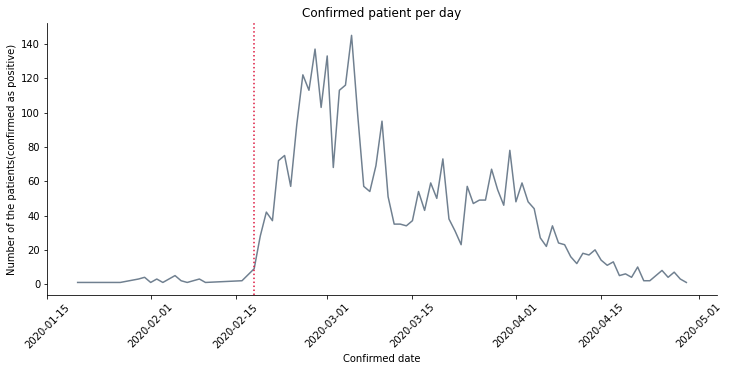

In [530]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=confirmed_data, x='confirmed_date', y='count', ax=ax, color='slategray')

ax.set_title("Confirmed patient per day")
ax.set_xlabel("Confirmed date")
ax.set_ylabel("Number of the patients(confirmed as positive)")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.canvas.draw()
x_tick_labels = [t.get_text() for t in ax.get_xticklabels()]
t = ax.set_xticklabels(x_tick_labels, rotation=45)

import datetime

ax.axvline(x=datetime.date(2020,2,18), c="crimson", linestyle=":")

유달리 확진자가 많은 날짜가 있긴 합니다. 슈퍼전파자자 중 1명이 확진을 받은 2월 18일과 비교를 해보니 조금 차이가 있긴하지만 약 2주 뒤부터 많은 숫자의 확진자가 나온 것으로 보아 영향이 있을 것으로 예상이 됩니다. 

갑자기 확진자수가 감소하는 부분은 요일과도 관계가 있을 것 같아 더 체크를 해봐야할 것 같습니다.

state에 대해서는 사망한 수를 위주로 분석해 치명률과 관련된 정보들을 파악해보겠습니다.

In [531]:
deceased_data = p_info[p_info['state'] == 'deceased']
deceased_num = len(deceased_data)
print(f"Fatality rate: {(deceased_num/len(p_info)):.2%}")

Fatality rate: 2.04%


지금 사용하고 있는 데이터로도 약 2%정도의 치명률을 보이고 있습니다. 이를 나이, 성별별로 분석을 해보겠습니다. 치명률에서는 기저질환 여부도 매우 중요할 것으로 예상이 됩니다. 따라서 disease에 해당하는 부분을 수정해주겠습니다. 모든 NaN값을 일단은 False로 처리를 해주겠습니다. 실제로는 기저질환 여부를 알 수 없는 경우가 있기 때문에 정확한 결과라고 보기는 어려울 것 같습니다. 다만 True인 경우의 치명률과 차이가 있는 지 정도는 살펴볼 수 있을 것 같습니다.

In [532]:
deceased_data['disease'].fillna('False', inplace=True)
deceased_data['disease'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


False    51
True     18
Name: disease, dtype: int64

Text(0, 0.5, 'Sex')

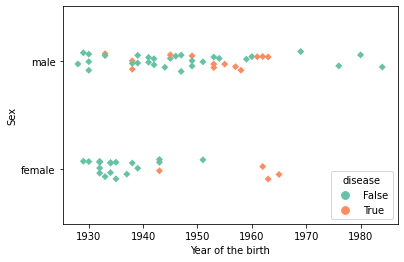

In [533]:
fig, ax = plt.subplots()
sns.stripplot(data=deceased_data, x='birth_year', y='sex', color='crimson', 
              marker='D', hue='disease', palette="Set2",
              ax=ax)

ax.set_xlabel("Year of the birth")
ax.set_ylabel("Sex")

해당 데이터로 확인할 수 있는 것은 일반적으로 나이가 많은 환자가 치명률이 더 높으며 대략적으로 살펴봤을 때는 남성이 조금 더 치명률이 높을 것으로 예상됩니다. 하지만 성별이 그렇게 큰 요인이 될 것 같지는 않습니다.

무리가 있지만 기저질환 여부를 통해서 봤을 때도 아주 큰 영향이 있을 것 같지는 않습니다. 하지만 이 경우는 앞에서도 말했듯이 모든 NaN값을 False로 대체한 경우이므로 실제 결과라고 판정하기는 어려울 것 같습니다.

birth_year 자체에도 NaN값이 있어 확실치는 않지만 1970년대생 이후로 가면 치명률이 아주 줄어드는 것을 확인할 수 있습니다.

In [534]:
age_deceased_data = deceased_data.groupby('age')['patient_id'].count()

Text(0.5, 1.0, 'Deceased rate by age group')

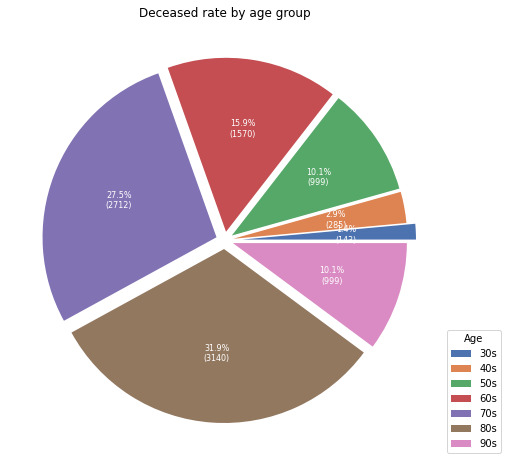

In [580]:
fig, ax = plt.subplots(figsize=(8, 8))

palette = sns.color_palette("deep", 7)
explode = [0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedges, texts, autotexts = ax.pie(age_deceased_data, autopct=lambda pct: func(pct, data),
                                  colors=palette,
                                  textprops=dict(color="w", fontsize=8, fontweight='light'),
                                  explode=explode)

labels = list(age_deceased_data.index)
ax.legend(wedges, labels,
          title="Age",
          loc="lower left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Deceased rate by age group")

In [536]:
age_group_idx = ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s']

deceased_per_age = age_deceased_data / p_info.groupby('age')['patient_id'].count()
deceased_per_age.fillna(0, inplace=True)
deceased_per_age = deceased_per_age.reindex(age_group_idx)

In [537]:
deceased_per_age = deceased_per_age.reset_index()
deceased_per_age.rename(columns={"patient_id": "deceased_rate"}, inplace=True)

deceased_per_age

,age,deceased_rate
0,0s,0.000000
1,10s,0.000000
2,20s,0.000000
3,30s,0.002283
4,40s,0.004396
5,50s,0.011725
6,60s,0.027431
7,70s,0.093137
8,80s,0.141026
9,90s,0.155556


Text(0, 0.5, 'Fatality rate')

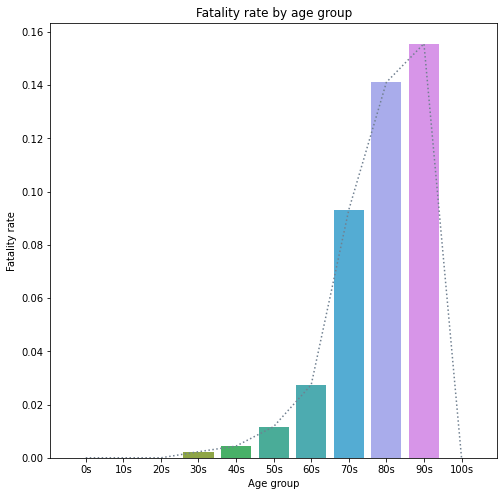

In [538]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.barplot(data=deceased_per_age, x='age', y='deceased_rate', ax=ax)
sns.lineplot(data=deceased_per_age, x='age', y='deceased_rate', ax=ax, 
             linestyle=':', color='slategray')

ax.set_title("Fatality rate by age group")
ax.set_xlabel("Age group")
ax.set_ylabel("Fatality rate")

치명률 자체가 70, 80, 90대에서 매우 높게 나오지만 이는 원래 고령에서 사망률이 높다는 것을 고려하면 그렇게 신기한 일은 아니라고 생각할 수 있을 것 같습니다.

## 3. Time
코로나에 대한 시계열 데이터를 분석해보겠습니다. 누적 검사수, 음성 인원 수, 양성 인원 수, 격리해제 인원 수, 사망 인원 수 등으로 나눠져있습니다. 결국은 모두 누적 데이터를 가지고 있는 일이라 우상향을 하는 모습을 보이고 있을 것입니다. 그보다는 일일별로 체크를 하는 것이 의미 있을 것 같아 조금 데이터를 수정해보겠습니다.

*test = negative + confirmed가 반드시 되야하는 것은 아닌 것 같습니다. 실제 데이터도 그렇게 구성되어있기도 하고 검사 후 약간의 시간 뒤에 양/음성 여부가 판단이 되지 않을까 생각이 듭니다.*

In [539]:
daily = time.copy()

daily[['test', 'negative', 'confirmed', 'released', 'deceased']] = daily[['test', 'negative', 'confirmed', 'released', 'deceased']].diff()
daily.iloc[0] = time.iloc[0]

daily['date'] = pd.to_datetime(daily['date'], format="%Y-%m-%d")

In [540]:
daily.tail()

,date,time,test,negative,confirmed,released,deceased
97,2020-04-26,0,3124.0,3374.0,10.0,82.0,2.0
98,2020-04-27,0,3375.0,3469.0,10.0,47.0,1.0
99,2020-04-28,0,6854.0,6532.0,14.0,90.0,1.0
100,2020-04-29,0,5683.0,6570.0,9.0,68.0,2.0
101,2020-04-30,0,5684.0,5353.0,4.0,137.0,1.0


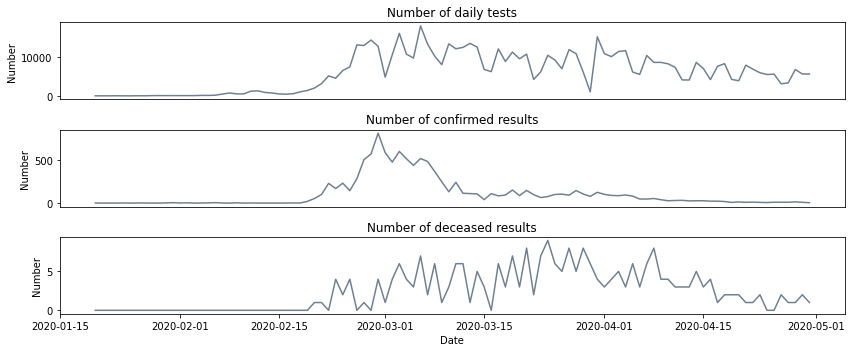

In [541]:
fig, axes = plt.subplots(figsize=(12,5), nrows=3, ncols=1)
axs = axes.ravel()

sns.lineplot(data=daily, x='date', y='test', ax=axs[0], color='slategray')
sns.lineplot(data=daily, x='date', y='confirmed', ax=axs[1], color='slategray')
sns.lineplot(data=daily, x='date', y='deceased', ax=axs[2], color='slategray')

axs[0].set_title("Number of daily tests")
axs[0].set_ylabel("Number")
axs[0].set_xticks([])
axs[0].set_xlabel("")

axs[1].set_title("Number of confirmed results")
axs[1].set_ylabel("Number")
axs[1].set_xticks([])
axs[1].set_xlabel("")

axs[2].set_title("Number of deceased results")
axs[2].set_ylabel("Number")
axs[2].set_xlabel("Date")
fig.canvas.draw()
# x_tick_labels = [t.get_text() for t in axs[2].get_xticklabels()]
# t = axs[2].set_xticklabels(x_tick_labels, rotation=45)


fig.tight_layout()
# import datetime

# ax.axvline(x=datetime.date(2020,2,18), c="crimson", linestyle=":")

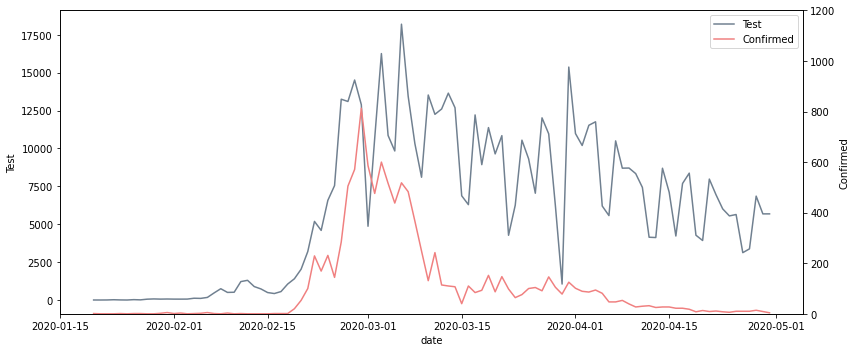

In [542]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=daily, x='date', y='test', ax=ax, color='slategray', label='Test')
ax.set_ylabel("Test")

ax_C = ax.twinx()
ax_C.set_ylim(0, 1200)
sns.lineplot(data=daily, x='date', y='confirmed', ax=ax_C, color='lightcoral', label='Confirmed')
ax_C.set_ylabel("Confirmed")
ax_C.get_legend().remove()

lines = ax.get_lines() + ax_C.get_lines()
ax.legend(lines, [line.get_label() for line in lines], loc='upper right')

fig.tight_layout()

그래프 모양을 봐서는 검사 수와 확진자 수의 관계가 그렇게 크지 않은 것으로 보입니다. 확진자 수 데이터를 14일 정도 뒤로 미뤄봐도 큰 관계성이 보이지 않습니다. (14일 범위안에서 조금씩 움직여보면 보일 수도 있을 것 같습니다.)

In [543]:
temp_daily = daily.copy()
temp_daily['date'] = daily['date'] - pd.Timedelta(days=14)
temp_daily

,date,time,test,negative,confirmed,released,deceased
0,2020-01-06,16,1.0,0.0,1.0,0.0,0.0
1,2020-01-07,16,0.0,0.0,0.0,0.0,0.0
2,2020-01-08,16,3.0,3.0,0.0,0.0,0.0
3,2020-01-09,16,18.0,18.0,0.0,0.0,0.0
4,2020-01-10,16,5.0,4.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
97,2020-04-12,0,3124.0,3374.0,10.0,82.0,2.0
98,2020-04-13,0,3375.0,3469.0,10.0,47.0,1.0
99,2020-04-14,0,6854.0,6532.0,14.0,90.0,1.0
100,2020-04-15,0,5683.0,6570.0,9.0,68.0,2.0


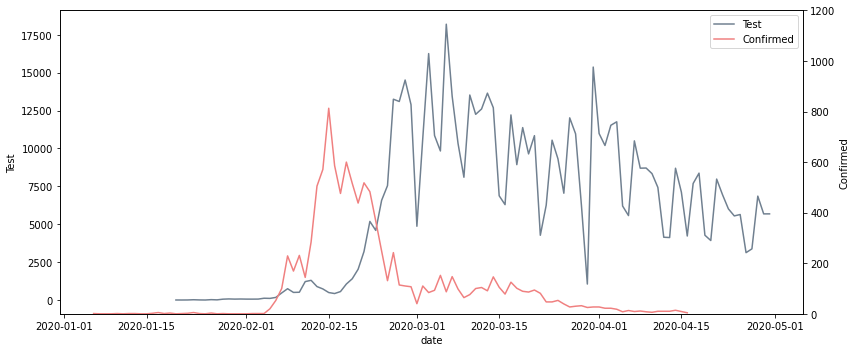

In [544]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=daily, x='date', y='test', ax=ax, color='slategray', label='Test')
ax.set_ylabel("Test")

ax_C = ax.twinx()
ax_C.set_ylim(0, 1200)
sns.lineplot(data=temp_daily, x='date', y='confirmed', ax=ax_C, color='lightcoral', label='Confirmed')
ax_C.set_ylabel("Confirmed")
ax_C.get_legend().remove()

lines = ax.get_lines() + ax_C.get_lines()
ax.legend(lines, [line.get_label() for line in lines], loc='upper right')

fig.tight_layout()

### (1) TimeAge, TimeGender, TimeProvince

나이대 별로 확진자, 사망자가 어떻게 변하는 지 알아보겠습니다.

In [545]:
t_age['date'] = pd.to_datetime(t_age['date'], format="%Y-%m-%d")
t_age.dtypes

date         datetime64[ns]
time                  int64
age                  object
confirmed             int64
deceased              int64
dtype: object

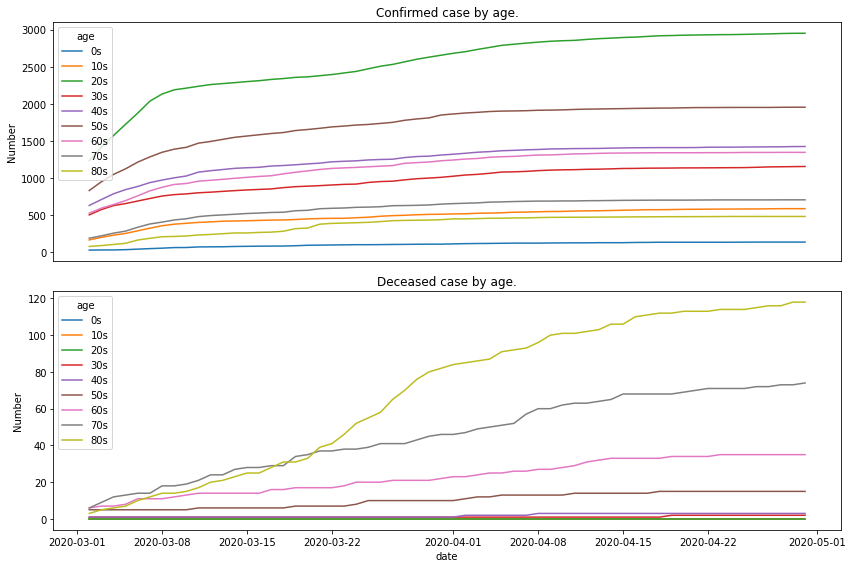

In [546]:
fig, axes = plt.subplots(figsize=(12, 8), nrows=2, ncols=1)
axs = axes.ravel()

sns.lineplot(data=t_age, x='date', y='confirmed', hue='age', ax=axs[0])
axs[0].set_title("Confirmed case by age.")
axs[0].set_ylabel("Number")
axs[0].set_xlabel("")
axs[0].set_xticks([])

sns.lineplot(data=t_age, x='date', y='deceased', hue='age', ax=axs[1])
axs[1].set_title("Deceased case by age.")
axs[1].set_ylabel("Number")

plt.tight_layout()

이번엔 누적 확진자 수를 비교하며 확인해보겠습니다. 

1. 2020년 3월 1일에서 3월 8일 사이에 20대 누적 확진자수가 급격히 증가한 것을 제외하면 전반적으로 비슷한 증가세를 보입니다. 급격히 증가한 부분을 제외하더라도 전반적으로 20대의 증가추세(기울기)가 더 가파르게 보이고 전반적인 확진자 수도 가장 많은 것을 알 수 있습니다.

2. 사망자 수는 50, 60, 70, 80 대만 유의미하게 기울기를 가지고 있고 순서에 따라 조금씩 가파르게 올라가고 있습니다. 반면에 0~40대 사이에는 사망자 변화가 거의 없을 정도로 평탄한 모습을 보이고 있습니다.

In [547]:
t_gender['date'] = pd.to_datetime(t_gender['date'], format="%Y-%m-%d")
t_gender.dtypes

date         datetime64[ns]
time                  int64
sex                  object
confirmed             int64
deceased              int64
dtype: object

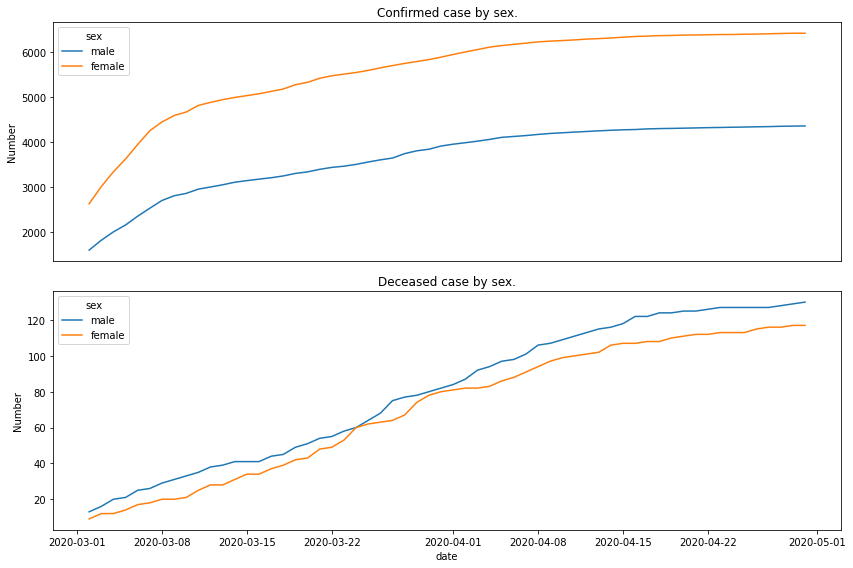

In [548]:
fig, axes = plt.subplots(figsize=(12, 8), nrows=2, ncols=1)
axs = axes.ravel()

sns.lineplot(data=t_gender, x='date', y='confirmed', hue='sex', ax=axs[0])
axs[0].set_title("Confirmed case by sex.")
axs[0].set_ylabel("Number")
axs[0].set_xlabel("")
axs[0].set_xticks([])

sns.lineplot(data=t_gender, x='date', y='deceased', hue='sex', ax=axs[1])
axs[1].set_title("Deceased case by sex.")
axs[1].set_ylabel("Number")

plt.tight_layout()

이번엔 성별별로 어떤 차이가 있는 지 누적 확진자 수를 비교하며 확인해보겠습니다. 

1. 전반적인 기울기는 비슷하지만 여성의 확진자 수가 더 많은 것은 아무래도 신천지 교회 또는 위에서 살펴본 것 처럼 구로 콜센터의 경우로 생각할 수도 있을 것 같습니다. 하지만 데이터의 범위(시간)이 다르므로 이에 유의를 하고 다시 살펴보는 것이 좋을 수도 있을 것 같습니다.

2. 사망자 수도 거의 비슷한 흐름을 보이고 있지만 남성이 사망하는 경우가 더 많은 것을 보면 확진되는 경우는 적지만 더 많이 사망하는 것을 알 수 있을 것 같습니다.

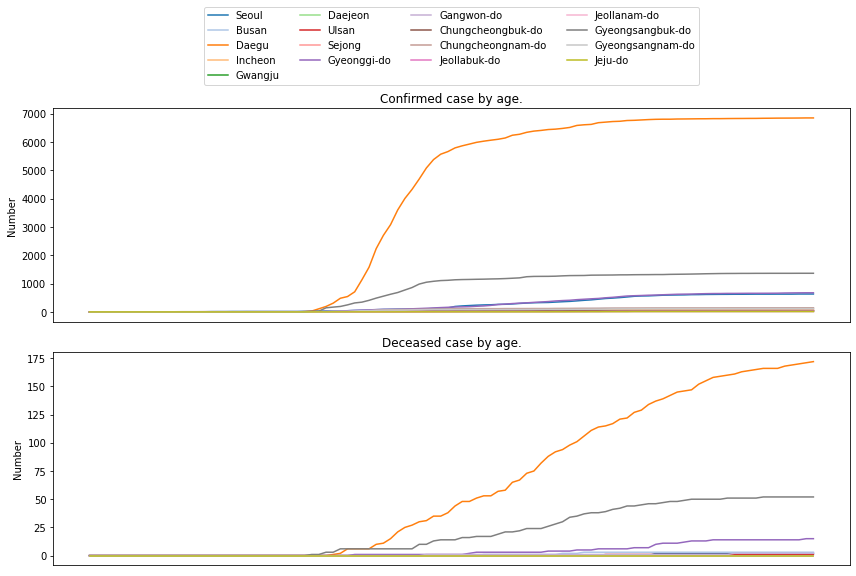

In [549]:
fig, axes = plt.subplots(figsize=(12, 8), nrows=2, ncols=1)
axs = axes.ravel()

palette = sns.color_palette("tab20", 17)

sns.lineplot(data=t_provin, x='date', y='confirmed', hue='province', ax=axs[0], palette=palette)
axs[0].set_title("Confirmed case by age.")
axs[0].set_ylabel("Number")
axs[0].set_xlabel("")
axs[0].set_xticks([])
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=4)

sns.lineplot(data=t_provin, x='date', y='deceased', hue='province', ax=axs[1], palette=palette)
axs[1].set_title("Deceased case by age.")
axs[1].set_ylabel("Number")
axs[1].set_xlabel("")
axs[1].set_xticks([])
axs[1].get_legend().remove()

plt.tight_layout()

전반적으로 신천지 때 데이터가 많아 대구, 경북 지역의 범위가 아주 크게 나오는 모습을 확인할 수 있습니다. 코로나 초기라 그런지 대구, 경북의 데이터가 워낙 많은 비중이 커서 그런지 신천지 교회가 코로나 초기에는 정말 큰 영향을 끼쳤다는 사실 외에 눈에 띄는 다른 부분은 없는 것 같습니다.

## Region
지역별 데이터에 대해서 살펴보겠습니다. 현재 위에서 분석한 사실을 다시 생각해보면 신천지 교회로 인해 대구, 경북 지역에 확진자가 상당히 많이 몰려있습니다. 그 뒤는 서울이 이어가고 있으며 대부분의 지역의 확진자 수가 그렇게 많지도 않고 비슷합니다.

이번 챕터에서는 가능하다면 지역별 초등학교, 유치원, 대학교, 학원의 수와 확진자 수의 분포가 관계가 있는 지 확인을 해보겠습니다. 또한 노인 인구, 독거 노인 가구, 요양원의 비율을 확인해 코로나로 인한 노인인구의 사망율과도 관련이 있는 지 확인해보겠습니다.

우선 전체적인 도시별 분포를 파악하기 위해 도시별 데이터를 모아보겠습니다. 데이터를 살펴보면 각 province 마다 가장 위에 종합된 데이터가 있습니다. 이 데이터는 province와 city 이름이 같게 설정되어있고, 마지막에는 Korea로 한 컬럼이 더 있으므로 삭제해 원하는 데이터를 만들겠습니다.

In [550]:
total_region = region.loc[region['province'] == region['city']]
total_region = total_region[:-1].reset_index()
total_region.drop('index', axis=1, inplace=True)
total_region

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,11000,Busan,Busan,35.179884,129.074796,304,408,22,1.40,18.41,8.6,6752
2,12000,Daegu,Daegu,35.872150,128.601783,229,355,11,1.62,15.78,7.5,5083
3,13000,Gwangju,Gwangju,35.160467,126.851392,155,312,17,2.38,13.57,6.4,2852
4,14000,Incheon,Incheon,37.456188,126.705920,250,403,7,1.27,13.20,5.8,4497
5,15000,Daejeon,Daejeon,36.350621,127.384744,148,260,15,1.49,13.65,5.8,2984
6,16000,Ulsan,Ulsan,35.539797,129.311538,119,200,4,2.21,11.76,5.2,1801
7,17000,Sejong,Sejong,36.480132,127.289021,48,60,3,1.78,9.48,3.8,491
8,20000,Gyeonggi-do,Gyeonggi-do,37.275119,127.009466,1277,2237,61,1.60,12.63,5.2,20491
9,30000,Gangwon-do,Gangwon-do,37.885369,127.729868,349,368,18,1.42,19.89,9.8,2519


### (1) Schools

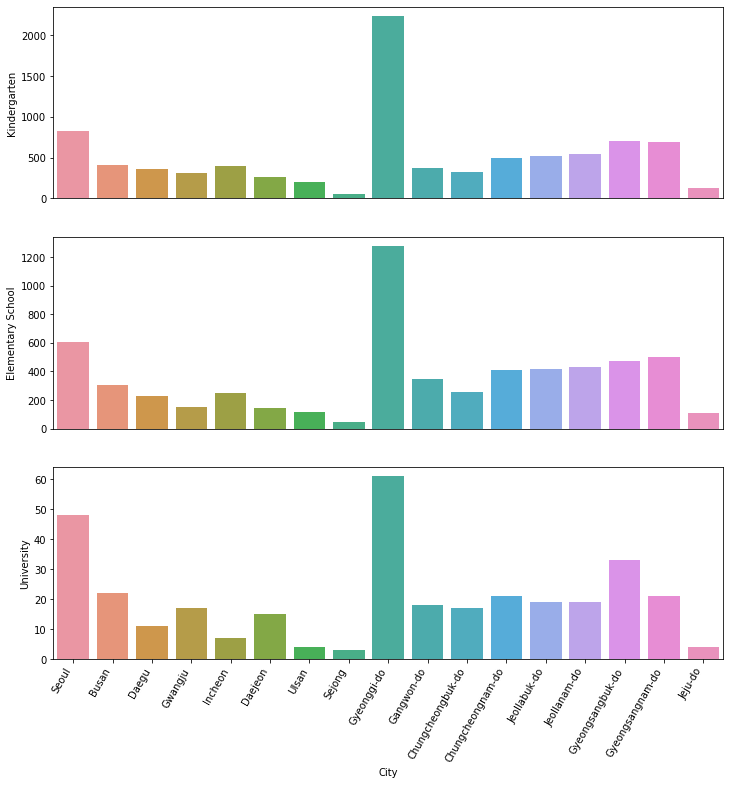

In [551]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
axs = axes.ravel()
sns.barplot(data=total_region, x='city', y='kindergarten_count', ax=axs[0])
axs[0].set_xticks([])
axs[0].set_xlabel("")
axs[0].set_ylabel("Kindergarten")

sns.barplot(data=total_region, x='city', y='elementary_school_count', ax=axs[1])
axs[1].set_xticks([])
axs[1].set_xlabel("")
axs[1].set_ylabel("Elementary School")

sns.barplot(data=total_region, x='city', y='university_count', ax=axs[2])
axs[2].set_xlabel("City")
axs[2].set_ylabel("University")
x_tick_labels = [t.get_text() for t in axs[2].get_xticklabels()]
t = axs[2].set_xticklabels(x_tick_labels, rotation=60, ha='right')

유치원, 초등학교, 대학교를 각각 지역마다 비교했을 때 상당히 비슷한 분포를 보이고 있습니다. 조금씩의 차이는 있지만 경기도에서 세 경우 모두 가장 높은 값, 그 다음은 서울이 가져가고 있습니다.



p_info 데이터를 보면 birth_year가 null값인 경우가 age가 null값인 경우보다 훨씬 많습니다. 따라서 상세하게 유치원생, 초등학생, 대학생으로 간주되는 환자를 체크하는 것은 어려울 것 같습니다. 심지어는 실제로 그 나이에 해당되더라도 반드시 학생이라고는 할 수 없는 문제도 있습니다. 

그러므로 추세적인 분석을 위해 30세(0s~20s)까지를 학생으로 간주하고, 유치원, 초등학교, 대학교를 전부 합친 경우를 함께 보면 어떤 차이가 있나 살펴보겠습니다.

In [552]:
total_region_temp = total_region.copy()
total_region_temp['total_school'] = total_region_temp['kindergarten_count'] + total_region_temp['elementary_school_count'] \
                                  + total_region_temp['university_count']
total_region_temp.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,total_school
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739,1485
1,11000,Busan,Busan,35.179884,129.074796,304,408,22,1.40,18.41,8.6,6752,734
2,12000,Daegu,Daegu,35.872150,128.601783,229,355,11,1.62,15.78,7.5,5083,595
3,13000,Gwangju,Gwangju,35.160467,126.851392,155,312,17,2.38,13.57,6.4,2852,484
4,14000,Incheon,Incheon,37.456188,126.705920,250,403,7,1.27,13.20,5.8,4497,660


In [553]:
s_info = p_info.loc[(p_info['age'] == '0s') | (p_info['age'] == '10s') | (p_info['age'] == '20s')]
s_info_count = s_info['province'].value_counts().reindex(idx_list).reset_index()
s_info_count.rename(columns={"index": "province",
                             "province": "count"}, inplace=True)
s_info_count

,province,count
0,Seoul,197
1,Busan,64
2,Daegu,8
3,Gwangju,11
4,Incheon,19
5,Daejeon,14
6,Ulsan,20
7,Sejong,4
8,Gyeonggi-do,188
9,Gangwon-do,8


Text(0, 0.5, 'Confirmed')

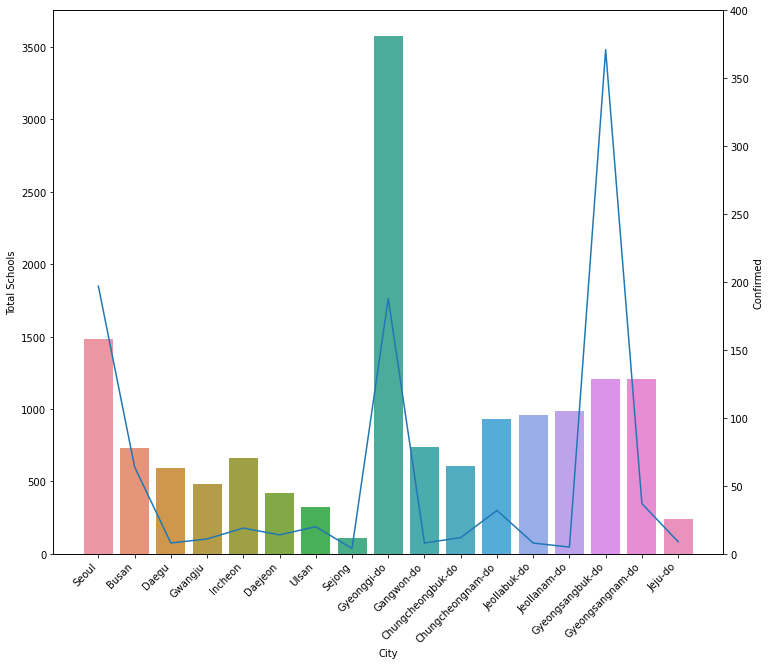

In [554]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=total_region_temp, x='city', y='total_school', ax=ax)

ax.set_xlabel("City")
ax.set_ylabel("Total Schools")

x_tick_labels = [t.get_text() for t in ax.get_xticklabels()]
t = ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')


ax_C = ax.twinx()
ax_C.set_ylim(0, 400)
sns.lineplot(data=s_info_count, x='province', y='count', ax=ax_C)
ax_C.set_ylabel("Confirmed")

전체적인 학교수가 줄어들면 확진자 수도 줄어들고, 늘어나면 늘어나는 것을 볼 수 있습니다. 하지만 강원도에서 전라남도까지 경우를 보면 반드시 그렇지 않은 경우도 있습니다. 경상북도의 경우 신천지 교회의 경우로 많은 학생 확진자 수가 있는 것으로 보입니다. 하지만 대구가 그렇지 않은 것을 보면 
1. 경상북도의 신천지 교회 관련 확진자는 학생이 많다.
2. 경상북도의 학생 확진자 수가 많은 건 별도의 이유이다.
정도로 생각을 할 수 있을 것 같습니다.

아무래도 학교가 많으면 인구가 많을테고 따라서 확진자가 많을 수 있지 않을까 하는 생각도 할 수 있습니다.

### (2) The elderly

독거노인 비율, 노인인구 비율과 사망율의 관계를 알아보겠습니다. 그림을 원활하게 그릴 수 있게 province를 센 데이터프레임에서 province를 tick에 해당하는 위치값으로 바꿔주겠습니다. 아래에서 그래프를 그리는 작업에서 이런식으로 수정하는 것이 더 그리기 쉬운 것 같아 나중에 수정해줬습니다.

In [555]:
elder_deceased_data = deceased_data.loc[(deceased_data['age'] == '60s') | (deceased_data['age'] == '70s') | (deceased_data['age'] == '80s') | (deceased_data['age'] == '90s')]
elder_deceased_count = elder_deceased_data['province'].value_counts().reset_index()

elder_deceased_count.rename(columns={"index": "province",
                                     "province": "count"}, inplace=True)

elder_deceased_count['province'] = [14, 2, 1, 9, 6, 0]
elder_deceased_count = elder_deceased_count.sort_values(by='province')

elder_deceased_count

,province,count
5,0,1
2,1,3
1,2,18
4,6,1
3,9,2
0,14,34


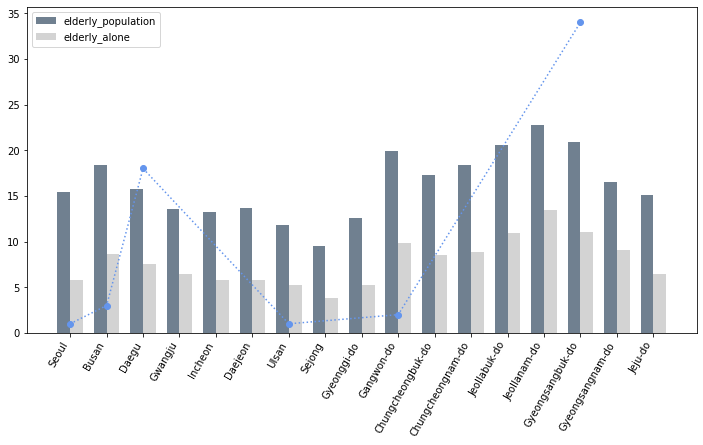

In [556]:
fig, ax = plt.subplots(figsize=(12, 6))
labels = total_region['city']

x = np.arange(len(labels))
width = 0.35

rects1 = ax.bar(x - width/2, height=total_region['elderly_population_ratio'], width=width, 
                label='elderly_population', color='slategray')
rects2 = ax.bar(x + width/2, height=total_region['elderly_alone_ratio'], width=width, 
                label='elderly_alone', color='lightgray')


x_tick_labels = [t.get_text() for t in ax.get_xticklabels()]
t = ax.set_xticklabels(x_tick_labels, rotation=60, ha='right')

ax.legend(loc='upper left')


ax.plot(elder_deceased_count['province'], elder_deceased_count['count'].to_numpy(), 
        'o:', color='cornflowerblue')

ax.set_xticks(x)
t=ax.set_xticklabels(labels)

실제로 60대 이상 코로나로 인한 사망자를 살펴보면 o로 표시된 지역밖에 나타나지 않습니다. 그리고 경북과 대구는 신천지의 시작점이기도 해 제외하고 보면 코로나 초기라 그런지 독거노인, 노인인구의 비율과 그다지 큰 상관이 있어보이지는 않습니다. 

추후에 경상북도의 코로나 환자에 대해 좀 더 살펴볼 필요가 있을 것 같습니다. 학생의 경우도 그렇고 이번 노인의 경우에도 유달리 높은 점을 보이는 것이 대구와도 다른 어떤 특징이 있을 수 있을 것 같습니다.

### (3) academy, nursing home

학원과 요양원은 청년층과 노년층만이 이용하는 특수한 시설처럼 생각할 수도 있을 것 같습니다. 따라서 학원의 수, 요양원 수에 따라 확진자들의 나이 분포가 어떻게 달라지는 지 살펴보면 유의미할 수도 있을 것 같습니다.

시각화를 해보고 특히나 학원과 요양원의 수가 차이나는 지역을 하나씩 뽑아서 어떻게 차이가 있는 지 살펴보겠습니다.

학원 비율은 비교적 낮고 요양원 수는 비교적 많은 곳은 선정하기가 힘들고 대구, 경북의 경우에는 신천지 교회로 인해 별도의 영향력이 꽤 클 것 같아서 제외하고 선택해봤습니다.

1. 학원 비율은 비교적 높고 요양원 수는 비교적 적은 곳: 광주
2. 학원 비율은 비교적 낮고 요양원 수는 비교적 많은 곳: 인천


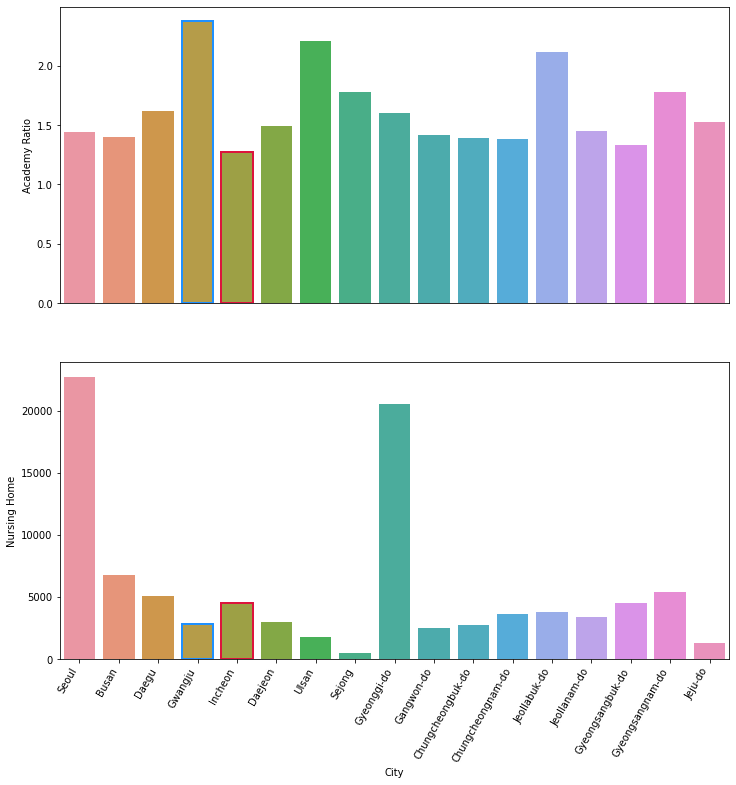

In [575]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
axs = axes.ravel()
sns.barplot(data=total_region, x='city', y='academy_ratio', ax=axs[0])
axs[0].set_xticks([])
axs[0].set_xlabel("")
axs[0].set_ylabel("Academy Ratio")

sns.barplot(data=total_region, x='city', y='nursing_home_count', ax=axs[1])
axs[1].set_xlabel("City")
axs[1].set_ylabel("Nursing Home")
x_tick_labels = [t.get_text() for t in axs[1].get_xticklabels()]
t = axs[1].set_xticklabels(x_tick_labels, rotation=60, ha='right')

### Analysis target ###
axs[0].patches[3].set_linewidth('2')
axs[0].patches[3].set_edgecolor('dodgerblue') ## 학원 비율은 비교적 높고 요양원 수는 비교적 적은 곳

axs[0].patches[4].set_linewidth('2')
axs[0].patches[4].set_edgecolor('crimson') ## 학원 비율은 비교적 낮고 요양원 수는 비교적 많은 곳

axs[1].patches[3].set_linewidth('2')
axs[1].patches[3].set_edgecolor('dodgerblue')

axs[1].patches[4].set_linewidth('2')
axs[1].patches[4].set_edgecolor('crimson')

In [604]:
gwangju_p_info = p_info.loc[p_info['province'] == 'Gwangju']
gwangju_p_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
830,1300000001,16.0,female,NaN,40s,Korea,Gwangju,NaN,NaN,overseas inflow,NaN,NaN,450.0,2020-01-27,2020-02-03,2020-02-20,NaN,released
831,1300000002,18.0,female,NaN,20s,Korea,Gwangju,NaN,NaN,contact with patient,NaN,1.300000e+09,8.0,NaN,2020-02-05,2020-02-20,NaN,released
832,1300000003,126.0,male,NaN,30s,Korea,Gwangju,NaN,NaN,etc,NaN,NaN,65.0,NaN,2020-02-20,2020-03-19,NaN,released
833,1300000004,164.0,male,NaN,30s,Korea,Gwangju,NaN,NaN,contact with patient,NaN,1.300000e+09,30.0,NaN,2020-02-21,2020-03-18,NaN,released
834,1300000005,210.0,male,NaN,30s,Korea,Gwangju,NaN,NaN,etc,NaN,NaN,156.0,NaN,2020-02-21,2020-03-16,NaN,released


Text(0.5, 1.0, 'Confirmed rate by age group in Gwangju')

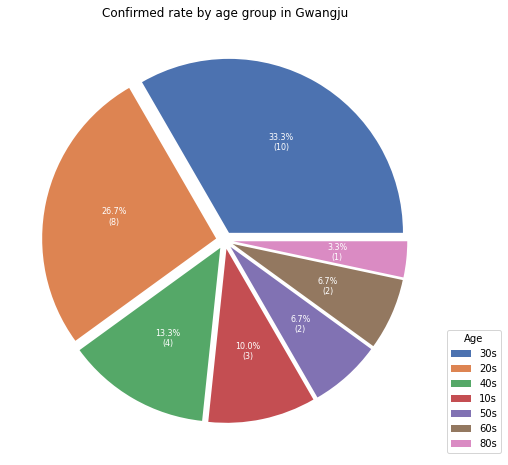

In [610]:
fig, ax = plt.subplots(figsize=(8, 8))
g_age_data = gwangju_p_info['age'].value_counts()

palette = sns.color_palette("deep", 7)
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedges, texts, autotexts = ax.pie(g_age_data, autopct=lambda pct: func(pct, g_age_data),
                                  colors=palette,
                                  textprops=dict(color="w", fontsize=8, fontweight='light'),
                                  explode=explode)

labels = list(g_age_data.index)
ax.legend(wedges, labels,
          title="Age",
          loc="lower left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Confirmed rate by age group in Gwangju")

광주의 경우 80대 이상 확진자는 1명, 그 외가 전부입니다. 그리고 10, 20대의 비율이 크게 나오고 있습니다. 이를 통해 학원, 요양원의 수 에 따라 그 지역의 나이대를 유추할 수 있을 것 같습니다. 그렇게 된다면 확진자의 나이대도 어느 정도 가늠할 수 있을 것 같습니다.

In [608]:
incheon_p_info = p_info.loc[p_info['province'] == 'Incheon']
incheon_p_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
860,1400000001,1.0,female,1985.0,30s,China,Incheon,etc,NaN,overseas inflow,NaN,NaN,NaN,2020-01-19,2020-01-20,2020-02-06,NaN,released
861,1400000002,398.0,female,1960.0,60s,Korea,Incheon,Bupyeong-gu,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-22,2020-03-09,NaN,released
862,1400000003,1129.0,male,1963.0,50s,Korea,Incheon,Michuhol-gu,NaN,etc,NaN,NaN,NaN,2020-01-31,2020-02-25,2020-03-03,NaN,released
863,1400000004,2021.0,female,1992.0,20s,Korea,Incheon,Seo-gu,NaN,contact with patient,NaN,NaN,NaN,NaN,2020-02-28,2020-03-25,NaN,released
864,1400000005,2592.0,male,1956.0,60s,Korea,Incheon,Bupyeong-gu,NaN,contact with patient,NaN,NaN,NaN,NaN,2020-02-28,2020-03-16,NaN,released


Text(0.5, 1.0, 'Confirmed rate by age group in Incheon')

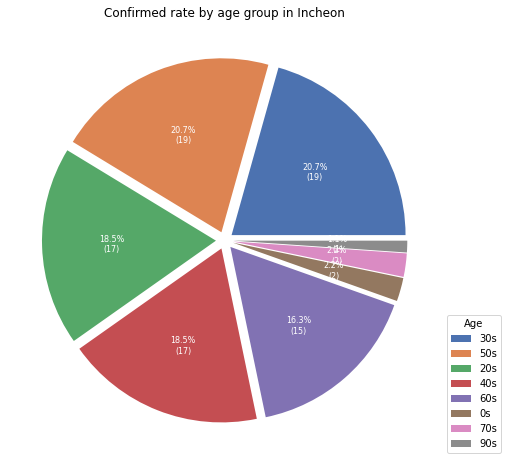

In [611]:
fig, ax = plt.subplots(figsize=(8, 8))
i_age_data = incheon_p_info['age'].value_counts()

palette = sns.color_palette("deep", 8)
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedges, texts, autotexts = ax.pie(i_age_data, autopct=lambda pct: func(pct, i_age_data),
                                  colors=palette,
                                  textprops=dict(color="w", fontsize=8, fontweight='light'),
                                  explode=explode)

labels = list(i_age_data.index)
ax.legend(wedges, labels,
          title="Age",
          loc="lower left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Confirmed rate by age group in Incheon")

이 경우에는 비교적 요양원이 많은 광주를 택했음에도 별로 유의미한 차이를 보기는 힘든 것 같습니다. 아무래도 그냥 인구가 많은 서울, 경기도를 제외하면 대부분 요양원의 수가 비슷하기 때문인 것 같습니다.

## Weather
날씨와 코로나는 어떤 관계가 있을까요? 날씨가 좋으면 사람들이 많이 돌아다녀서 유달리 확진자가 많을까요, 혹은 날씨가 습하면 사람들이 마스크를 끼기 힘들어해서 확진자가 많아질까요?

이를 한번 분석을 통해 확인해보도록 하겠습니다. 우선 앞에서 사용한 일일 확진자를 체크한 데이터(daily)도 가져와보도록 하겠습니다.

그리고 날씨 데이터도 daily 데이터의 날짜와 맞춰주겠습니다.

In [646]:
weather['date'] = pd.to_datetime(weather['date'], format="%Y-%m-%d")

weather_ex = weather.loc[(weather['date'] >= daily['date'].min()) & (weather['date'] <= daily['date'].max())]

weather_ex

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
23679,10000,Seoul,2020-01-20,0.7,-3.3,5.5,0.0,5.7,270.0,46.8
23680,11000,Busan,2020-01-20,5.1,1.6,9.8,0.0,6.1,270.0,45.6
23681,12000,Daegu,2020-01-20,4.6,2.4,8.1,0.0,6.4,290.0,44.1
23682,13000,Gwangju,2020-01-20,4.0,1.2,7.9,0.0,3.3,270.0,63.1
23683,14000,Incheon,2020-01-20,1.2,-2.1,5.1,0.0,8.6,320.0,56.0
...,...,...,...,...,...,...,...,...,...,...
25290,50000,Jeollabuk-do,2020-04-29,15.1,7.8,23.0,0.0,4.4,140.0,42.6
25291,51000,Jeollanam-do,2020-04-29,15.6,11.3,20.2,0.0,8.0,200.0,42.8
25292,60000,Gyeongsangbuk-do,2020-04-29,16.7,11.0,25.1,0.0,7.3,180.0,42.6
25293,61000,Gyeongsangnam-do,2020-04-29,15.2,7.6,24.5,0.0,4.2,50.0,47.0


지역마다 평균적인 날씨의 특성들이 많이 달라서 한번에 평균을 내서 일별로 체크를 하는 것이 무리가 있을 것 같지만 차이가 있는 만큼 그대로 반영이 되며, 일별로 차이를 보일 수는 있을 것 같아 일단은 일별로 평균을 내서 사용해보겠습니다.

In [647]:
weather_ex = weather_ex.groupby('date')['avg_temp', 'precipitation', 'avg_relative_humidity'].mean()
weather_ex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,avg_temp,precipitation,avg_relative_humidity
date,,,
2020-01-20,3.47500,0.0000,53.27500
2020-01-21,1.89375,0.0000,47.96250
2020-01-22,4.48125,5.9625,67.63750
2020-01-23,6.31250,2.0625,77.18125
2020-01-24,5.62500,1.3875,70.70000
...,...,...,...
2020-04-25,14.87500,0.0000,51.17500
2020-04-26,12.56250,0.3125,53.08125
2020-04-27,12.33750,0.0875,55.12500


In [648]:
ex_daily = daily[:-1]

In [649]:
weather_daily_df = pd.merge(weather_ex, ex_daily, on='date')

In [650]:
weather_daily_df = weather_daily_df[['date', 'avg_temp', 'precipitation', 'avg_relative_humidity', 'confirmed']]
weather_daily_df

,date,avg_temp,precipitation,avg_relative_humidity,confirmed
0,2020-01-20,3.47500,0.0000,53.27500,1.0
1,2020-01-21,1.89375,0.0000,47.96250,0.0
2,2020-01-22,4.48125,5.9625,67.63750,0.0
3,2020-01-23,6.31250,2.0625,77.18125,0.0
4,2020-01-24,5.62500,1.3875,70.70000,1.0
...,...,...,...,...,...
96,2020-04-25,14.87500,0.0000,51.17500,10.0
97,2020-04-26,12.56250,0.3125,53.08125,10.0
98,2020-04-27,12.33750,0.0875,55.12500,10.0
99,2020-04-28,13.80625,0.0000,51.21875,14.0


In [658]:
weather_daily_df['avg_relative_humidity'].min(), weather_daily_df['avg_relative_humidity'].max()

(41.2, 89.61875)

이번에도 날씨 데이터를 14일 정도 뒤로 밀어서 비교해보는 것이 더 좋을 것 같습니다.

In [655]:
temp_weather_daily_df = weather_daily_df.copy()
temp_weather_daily_df['date'] = weather_daily_df['date'] - pd.Timedelta(days=14)
temp_weather_daily_df

,date,avg_temp,precipitation,avg_relative_humidity,confirmed
0,2020-01-06,3.47500,0.0000,53.27500,1.0
1,2020-01-07,1.89375,0.0000,47.96250,0.0
2,2020-01-08,4.48125,5.9625,67.63750,0.0
3,2020-01-09,6.31250,2.0625,77.18125,0.0
4,2020-01-10,5.62500,1.3875,70.70000,1.0
...,...,...,...,...,...
96,2020-04-11,14.87500,0.0000,51.17500,10.0
97,2020-04-12,12.56250,0.3125,53.08125,10.0
98,2020-04-13,12.33750,0.0875,55.12500,10.0
99,2020-04-14,13.80625,0.0000,51.21875,14.0


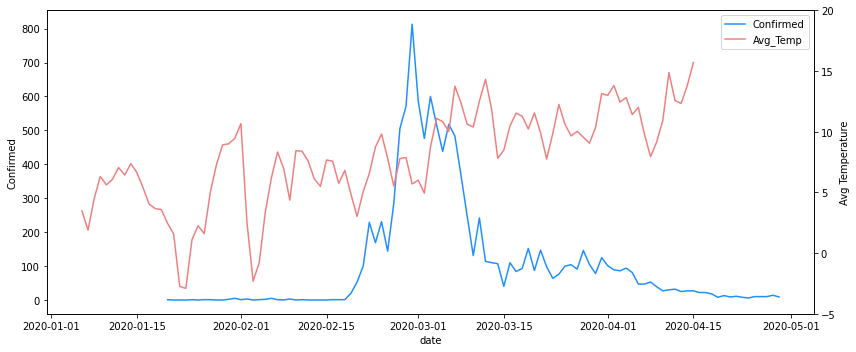

In [660]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=weather_daily_df, x='date', y='confirmed', ax=ax, color='dodgerblue', label='Confirmed')
ax.set_ylabel("Confirmed")

ax_C = ax.twinx()
ax_C.set_ylim(-5, 20)
sns.lineplot(data=temp_weather_daily_df, x='date', y='avg_temp', ax=ax_C, color='lightcoral', label='Avg_Temp')
ax_C.set_ylabel("Avg Temperature")
ax_C.get_legend().remove()

lines = ax.get_lines() + ax_C.get_lines()
ax.legend(lines, [line.get_label() for line in lines], loc='upper right')

fig.tight_layout()

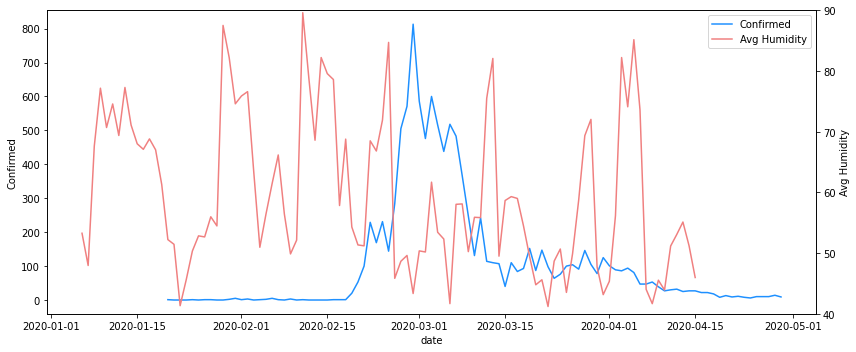

In [661]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=weather_daily_df, x='date', y='confirmed', ax=ax, color='dodgerblue', label='Confirmed')
ax.set_ylabel("Confirmed")

ax_C = ax.twinx()
ax_C.set_ylim(40, 90)
sns.lineplot(data=temp_weather_daily_df, x='date', y='avg_relative_humidity', ax=ax_C, color='lightcoral', label='Avg Humidity')
ax_C.set_ylabel("Avg Humidity")
ax_C.get_legend().remove()

lines = ax.get_lines() + ax_C.get_lines()
ax.legend(lines, [line.get_label() for line in lines], loc='upper right')

fig.tight_layout()

데이터로 살펴본 바로는 딱히 온도, 습도와는 큰 관계가 없는 것 같습니다. 아무래도 다양한 지역의 값을 하나로 합쳐버려 문제가 생긴 것 같기도 합니다. 

*추후에 서울의 평균적인 날씨값과 서울의 확진자수로 비교하는 것이 더욱 의미있어 보입니다.*

## Conclusion
EDA를 시작하기 전에 데이터를 대략 살펴보며 준비한 질문에 대한 답변을 개략적으로 정리하면서 마무리 해보겠습니다.

몇가지는 아직 분석을 하지 못해 질문으로 남겨둔 부분도 있습니다.

1. 슈퍼전파자는 어떤 특성을 가질까?
    - 많은 곳에 돌아다니는 사람일까 아니면 특별히 유동인구가 많은 지역만 골라다니는 사람일까?
    - *→ PatientRoute로 파악해보기.* 
    - 증상이 시작된 날짜와 확진날짜의 차이가 있을까?, 증상이 있었음에도 검사를 늦게 받아서 여기저기 전파시킨 건 아닐까?
    - → NaN이 많아서 파악하기 힘들다.
2. 집단감염이 문제일까?
    - 코로나 초기에 문제가 됐던 대구 신천지 교회발 집단감염이 많은 인원이긴 하지만 실제로는 개별 감염자가 훨씬 많았을 수도 있지 않을까?
    - → 집단감염이 훨씬 많았다. Case (4) infection_case
    - 집단감염이 많이 되는 곳의 지역적 특성이나 다른 특성이 있을까? 특정 집단이나 산업군에 종사하면 각별히 주의해야 한다고 할 수 있을까?
    - → 현재로는 신천지 데이터가 너무 커서 지역적 특성은 신천지를 생각할 수 밖에 없다. 굳이 집단, 산업군에 관한 분석을 생각해보면 구로구 콜센터의 영향으로 중년 여성이 많았음을 생각할 수 있다.
3. 해외유입을 초기에 막는 것이 얼마나 중요했을까?
    - 초기에 입국제한을 빨리 시행한 나라들은 비교적 코로나를 수월하게 막을 수 있었다는 얘기가 종종 있었는데 사실일까?
    - → *데이터 자체는 overseas inflow에 해당하는 부분이 그렇지 많지는 않지만 여기에 해당하는 환자들이 언제 확진이 됐는 지 파악해봐야한다. 초기라면 코로나를 시작하게 된 대부분의 원인이 여기에 몰려있을 수도 있다.*
    - 해외유입으로 시작됐다고 볼 수 있는 감염자 수는 얼마나 될까? (해외유입A → 국내환자A → 국내환자 C,D ...)
4. 전반적인 시계열 분석
    - 코로나 확진자수가 점점 어떻게 변해가고 있을까? 정부 정책과는 어떤 상관관계가 있을까?
    - *→ Policy*
5. 왜 20대들이 백신을 맞아야 하는걸까?
    - 만약 코로나로 인한 사망률이 현저하게 낮다면 또는 비교가 가능해서 백신에 비해 사망률이 적다면 굳이 맞을 필요가 있을까? 하지만 20대들이 사망률은 낮지만 그만큼 전파율이 높다면 집단방역을 위해 꼭 맞아야 한다고 설명을 할 수 있지 않을까?
    - *→ 치명률이 낮은 건 확인했는데 전파율은 확인할 수 있을까? 나이에 따른 평균 contact_number를 확인해보자.*
6. 학교와 확진자수의 관계는 어떨까?(태환)
    - 유치원, 초등학교가 밀집된 지역은 유달리 조심해서 확진자 수가 적을까?
    - 대학교가 많은 지역은 확진자 수가 더 많을까? 조기에 비대면으로 바뀌어 적을까?
    - → 딱히 그렇다고 얘기하기는 힘들 것 같다.
7. 날씨와 확진자수의 관계는 어떨까?
    - 날씨가 좋으면 나가서 노는 사람이 많아서 확진자 수가 많아질까?
    - 날씨가 습하면 마스크 쓰기가 힘들어서 확진자 수가 많아질까?
    - 실제로 바이러스 전파와 습도, 온도가 관계가 있을까?

    → 이것도 파악하기가 매우 힘들다.

## SearchTrend

In [662]:
search.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [671]:
search['flu'].max()

27.327270000000002

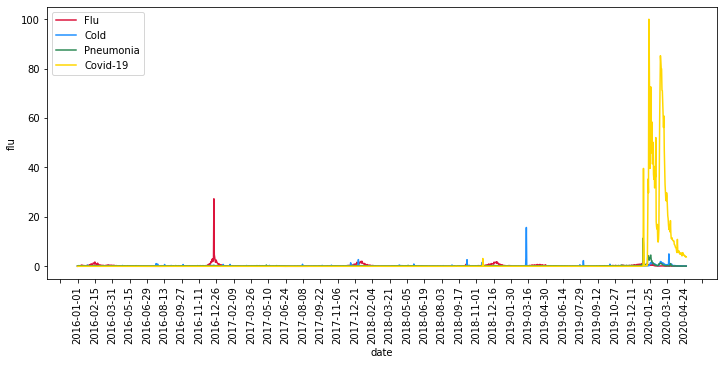

In [684]:
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=search, x='date', y='flu', ax=ax, color='crimson', label='Flu')
sns.lineplot(data=search, x='date', y='cold', ax=ax, color='dodgerblue', label='Cold')
sns.lineplot(data=search, x='date', y='pneumonia', ax=ax, color='seagreen', label='Pneumonia')
sns.lineplot(data=search, x='date', y='coronavirus', ax=ax, color='gold', label='Covid-19')

ax.xaxis.set_major_locator(MultipleLocator(45))
fig.canvas.draw()
x_tick_labels = [t.get_text() for t in ax.get_xticklabels()]
t = ax.set_xticklabels(x_tick_labels, rotation=90)